In [180]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from visual_behavior import database as db
from allensdk.brain_observatory.behavior.behavior_ophys_session import BehaviorOphysSession
import seaborn as sns
from visual_behavior.ophys.response_analysis.response_analysis import ResponseAnalysis
import visual_behavior.ophys.response_analysis.response_processing as rp
import visual_behavior.data_access.loading as loading

from multiprocessing import Pool
%widescreen

In [80]:
from dro.modules import plotting as plotting
import visual_behavior.visualization.ophys.summary_figures as sf

In [6]:
cache = loading.get_visual_behavior_cache()
experiments_table = loading.get_filtered_ophys_experiment_table()

In [20]:
#'ophys_experiment_id_993862120__cre_line_Vip-IRES-Cre'
ophys_experiment_id = 993862120
behavior_session_id = experiments_table.query('ophys_experiment_id == {}'.format(experiment_id))['behavior_session_id'].iloc[0]
behavior_session_id

993691759

In [7]:
experiments_table.head()

,ophys_experiment_id,ophys_session_id,behavior_session_id,container_id,project_code,container_workflow_state,experiment_workflow_state,session_name,session_type,equipment_name,date_of_acquisition,isi_experiment_id,specimen_id,sex,age_in_days,full_genotype,reporter_line,driver_line,imaging_depth,targeted_structure,published_at,super_container_id,cre_line,session_tags,failure_tags,exposure_number,location
0,953659743,952430817,952554548,1018028345,VisualBehaviorMultiscope,holding,passed,20190923_457841_2imagesA,OPHYS_2_images_A_passive,MESO.1,2019-09-23 08:13:07.627573,858992726,850862430,F,209.0,Sst-IRES-Cre/wt;Ai148(TIT2L-GC6f-ICL-tTA2)/wt,['Ai148(TIT2L-GC6f-ICL-tTA2)'],['Sst-IRES-Cre'],225,VISp,NaN,850862430,Sst-IRES-Cre,NaN,"z_drift_corr_um_diff,z_drift_corr_um_diff,z_dr...",0,Sst_VISp_225
3,953659749,952430817,952554548,1018028354,VisualBehaviorMultiscope,holding,passed,20190923_457841_2imagesA,OPHYS_2_images_A_passive,MESO.1,2019-09-23 08:13:07.627573,858992726,850862430,F,209.0,Sst-IRES-Cre/wt;Ai148(TIT2L-GC6f-ICL-tTA2)/wt,['Ai148(TIT2L-GC6f-ICL-tTA2)'],['Sst-IRES-Cre'],150,VISl,NaN,850862430,Sst-IRES-Cre,NaN,"z_drift_corr_um_diff,z_drift_corr_um_diff,z_dr...",0,Sst_VISl_150
4,953659752,952430817,952554548,1018028357,VisualBehaviorMultiscope,holding,passed,20190923_457841_2imagesA,OPHYS_2_images_A_passive,MESO.1,2019-09-23 08:13:07.627573,858992726,850862430,F,209.0,Sst-IRES-Cre/wt;Ai148(TIT2L-GC6f-ICL-tTA2)/wt,['Ai148(TIT2L-GC6f-ICL-tTA2)'],['Sst-IRES-Cre'],225,VISl,NaN,850862430,Sst-IRES-Cre,NaN,"z_drift_corr_um_diff,z_drift_corr_um_diff,z_dr...",0,Sst_VISl_225
6,953659745,952430817,952554548,1018028339,VisualBehaviorMultiscope,holding,passed,20190923_457841_2imagesA,OPHYS_2_images_A_passive,MESO.1,2019-09-23 08:13:07.627573,858992726,850862430,F,209.0,Sst-IRES-Cre/wt;Ai148(TIT2L-GC6f-ICL-tTA2)/wt,['Ai148(TIT2L-GC6f-ICL-tTA2)'],['Sst-IRES-Cre'],75,VISp,NaN,850862430,Sst-IRES-Cre,NaN,"z_drift_corr_um_diff,z_drift_corr_um_diff,z_dr...",0,Sst_VISp_75
8,958527481,954954402,953982960,1018028357,VisualBehaviorMultiscope,holding,passed,20190924_457841_3imagesA,OPHYS_3_images_A,MESO.1,2019-09-24 16:00:00.000000,858992726,850862430,F,210.0,Sst-IRES-Cre/wt;Ai148(TIT2L-GC6f-ICL-tTA2)/wt,['Ai148(TIT2L-GC6f-ICL-tTA2)'],['Sst-IRES-Cre'],225,VISl,NaN,850862430,Sst-IRES-Cre,NaN,NaN,0,Sst_VISl_225


In [18]:
%%time
flash_metrics = loading.get_stim_metrics_summary(behavior_session_id,load_location='from_database')

CPU times: user 123 ms, sys: 29.8 ms, total: 153 ms
Wall time: 204 ms


In [21]:
cache_dir = r'\\allen\programs\braintv\workgroups\nc-ophys\visual_behavior\visual_behavior_production_analysis'.replace('\\','/')
dataset = loading.get_sdk_dataset(ophys_experiment_id, cache_dir)

Sync photodiode error needs to be fixed. Using assumed monitor delay: 0.0351
/home/dougo/Code/AllenSDK/allensdk/brain_observatory/sync_dataset.py:109: UserWarning: The loaded sync file contains the following deprecated line label keys: {'cam2_exposure', 'cam1_exposure'}. Consider updating the sync file line labels.
  self._check_line_labels()
/home/dougo/Code/AllenSDK/allensdk/brain_observatory/sync_dataset.py:109: UserWarning: The loaded sync file contains the following deprecated line label keys: {'cam2_exposure', 'cam1_exposure'}. Consider updating the sync file line labels.
  self._check_line_labels()


In [270]:
#use this for plot filename generation
dataset.analysis_folder

'993862120_489066_191211_VISp_175_cre_line_unknown_2P4_behavior_4ImagesA'

In [269]:
%%time
analysis = ResponseAnalysis(dataset, overwrite_analysis_files=True) 
odf = analysis.get_response_df_path(df_name='omission_response_df')

CPU times: user 3.07 ms, sys: 0 ns, total: 3.07 ms
Wall time: 3.23 ms


'//allen/programs/braintv/workgroups/nc-ophys/visual_behavior/visual_behavior_production_analysis/993862120_489066_191211_VISp_175_cre_line_unknown_2P4_behavior_4ImagesA/omission_response_df.h5'

In [187]:
traces = np.stack(dataset.dff_traces['dff'].values)
frame_rate=None
trace_ids = dataset.dff_traces.index.values
timestamps = dataset.ophys_timestamps
stimuli = dataset.stimulus_presentations
omission_presentations = stimuli[stimuli.image_name == 'omitted']
event_times = omission_presentations['start_time'].values[:-1]  # last omission can get truncated
event_indices = rp.index_of_nearest_value(dataset.ophys_timestamps, event_times)
event_ids = omission_presentations.index.values[:-1]
response_analysis_params = rp.get_default_omission_response_params()

response_xr = rp.get_response_xr(dataset, traces, timestamps, event_times, event_ids, trace_ids,
                             response_analysis_params, frame_rate)

/home/dougo/Code/visual_behavior_analysis/visual_behavior/ophys/response_analysis/response_processing.py:234: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/home/dougo/Code/visual_behavior_analysis/visual_behavior/ophys/response_analysis/response_processing.py:288: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [244]:
response_xr = rp.get_omission_response_xr(dataset, use_events=False, frame_rate=None)

/home/dougo/Code/visual_behavior_analysis/visual_behavior/ophys/response_analysis/response_processing.py:236: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/home/dougo/Code/visual_behavior_analysis/visual_behavior/ophys/response_analysis/response_processing.py:290: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [245]:
response_xr

<xarray.Dataset>
Dimensions:                 (eventlocked_timestamps: 309, trace_id: 26, trial_id: 173)
Coordinates:
  * eventlocked_timestamps  (eventlocked_timestamps) float64 -4.977 ... 4.977
  * trial_id                (trial_id) int64 134 173 198 228 ... 4784 4787 4794
  * trace_id                (trace_id) int64 993614209 993614256 ... 993614271
Data variables:
    eventlocked_traces      (eventlocked_timestamps, trial_id, trace_id) float64 0.001486 ... 0.01118
    mean_response           (trial_id, trace_id) float64 -0.001657 ... 0.007884
    mean_baseline           (trial_id, trace_id) float64 0.03137 ... -0.0005244
    p_value_omission        (trial_id, trace_id) float64 0.5723 ... 0.2175
    p_value_stimulus        (trial_id, trace_id) float64 0.6261 ... 0.2423
    p_value_gray_screen     (trial_id, trace_id) float64 0.6118 ... 0.3241

In [250]:
df = response_xr.to_dataframe().reset_index().rename(columns={'trial_id': 'trials_id', 'trace_id': 'cell_specimen_id'})
df.head()

,eventlocked_timestamps,cell_specimen_id,trials_id,eventlocked_traces,mean_response,mean_baseline,p_value_omission,p_value_stimulus,p_value_gray_screen
0,-4.976557,993614209,134,0.001486,-0.001657,0.031369,0.5723,0.6261,0.6118
1,-4.976557,993614209,173,0.000012,-0.047252,-0.004950,0.9946,0.9997,0.9965
2,-4.976557,993614209,198,0.062298,0.002429,0.000880,0.4148,0.4353,0.4251
3,-4.976557,993614209,228,-0.059717,-0.018392,0.065786,0.9779,0.9852,0.9593
4,-4.976557,993614209,256,0.022761,0.017519,-0.000613,0.1510,0.0824,0.0981


In [251]:
df.query('trials_id == 134 and cell_specimen_id == 993614209')

,eventlocked_timestamps,cell_specimen_id,trials_id,eventlocked_traces,mean_response,mean_baseline,p_value_omission,p_value_stimulus,p_value_gray_screen
0,-4.976557,993614209,134,0.001486,-0.001657,0.031369,0.5723,0.6261,0.6118
4498,-4.944241,993614209,134,0.068044,-0.001657,0.031369,0.5723,0.6261,0.6118
8996,-4.911926,993614209,134,0.018367,-0.001657,0.031369,0.5723,0.6261,0.6118
13494,-4.879611,993614209,134,0.014892,-0.001657,0.031369,0.5723,0.6261,0.6118
17992,-4.847296,993614209,134,-0.001669,-0.001657,0.031369,0.5723,0.6261,0.6118
...,...,...,...,...,...,...,...,...,...
1367392,4.847296,993614209,134,0.027246,-0.001657,0.031369,0.5723,0.6261,0.6118
1371890,4.879611,993614209,134,-0.044378,-0.001657,0.031369,0.5723,0.6261,0.6118
1376388,4.911926,993614209,134,0.008167,-0.001657,0.031369,0.5723,0.6261,0.6118
1380886,4.944241,993614209,134,-0.004649,-0.001657,0.031369,0.5723,0.6261,0.6118


In [247]:
%%time
# get dataframe from xarray
df = response_xr['eventlocked_traces'].to_dataframe().reset_index().rename(columns={'trial_id': 'stimulus_presentations_id', 'trace_id': 'cell_specimen_id'})

# merge in Alex's metrics
df = df.merge(
    flash_metrics,
    left_on = 'stimulus_presentations_id',
    right_on = 'flash_index',
    how = 'left'
)

# convert 'flash_metrics_label' to 'engagement_state'
def assign_engagement_label(input_label):
    if 'high-lick' in input_label:
        return 'engaged'
    elif 'low-lick' in input_label:
        return 'disengaged'
df['engagement_state'] = df['flash_metrics_labels'].map(lambda x: assign_engagement_label(x))

CPU times: user 1.04 s, sys: 761 ms, total: 1.8 s
Wall time: 1.8 s


CPU times: user 4.7 s, sys: 367 ms, total: 5.07 s
Wall time: 5.04 s


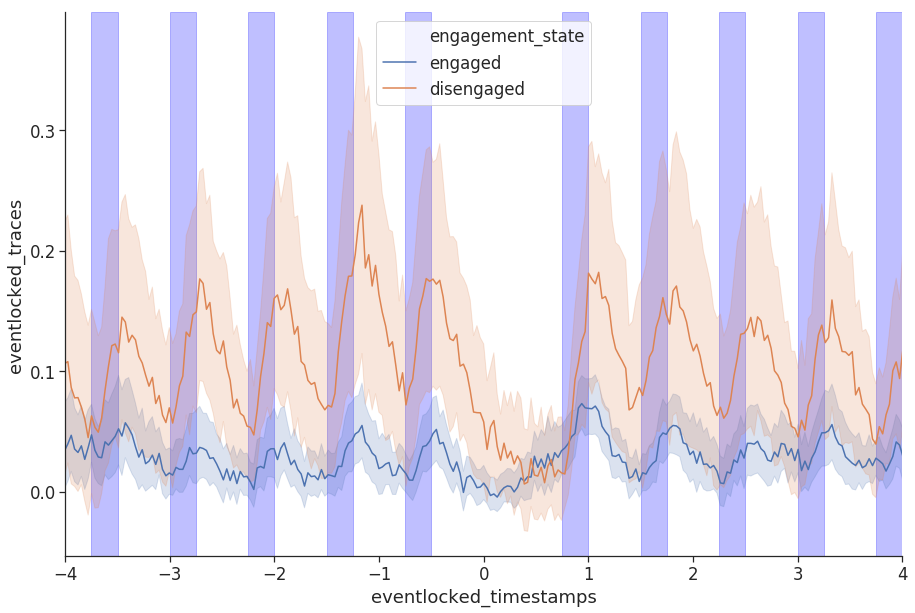

In [242]:
%%time
fig,ax=plt.subplots(figsize=(15,10))

cell_id = 993614193
sns.lineplot(
    x = 'eventlocked_timestamps',
    y = 'eventlocked_traces',
    data = df.query('cell_specimen_id == @cell_id'),
    hue='engagement_state',
)

plotting.designate_flashes(
    ax,
    omit=0,
)

ax.set_xlim(-4,4)

In [205]:
len(odfm_melted)

1389882

In [192]:
len(odf['stimulus_presentations_id'].unique())

173

In [25]:
odf = analysis.get_response_df(df_name='omission_response_df')
odfm = odf.merge(
    flash_metrics,
    left_on = 'stimulus_presentations_id',
    right_on = 'flash_index',
    how = 'left'
)
odfm.tail()

loading omission_response_df


,stimulus_presentations_id,cell_specimen_id,trace,trace_timestamps,mean_response,baseline_response,p_value_omission,p_value_stimulus,duration,end_frame,image_index_x,image_name_x,image_set,index,omitted_x,orientation,start_frame_x,start_time_x,stop_time_x,_id,flash_index,image_index_y,image_name_y,omitted_y,change,licked,lick_rate,rewarded,reward_rate,running_rate,bout_rate,hit_bout,hit_fraction,hit_rate,miss_rate,false_alarm_rate,correct_reject_rate,d_prime,criterion,high_lick,high_reward,flash_metrics_epochs,flash_metrics_labels,in_bout,bias,omissions1,task0,timing1D,start_time_y,start_frame_y,stop_time_y,epoch,behavior_session_id,criterion_negative,motivation_state,session_cluster_id,session_cluster_name
4493,4794,993614268,"[0.0, -0.020426774886700683, -0.00655173607952...","[-4.976556784712757, -4.944241480915921, -4.91...",0.002131,0.001749,0.3910,0.3945,NaN,NaN,8,omitted,omitted,172,True,NaN,233713,3906.7149,NaN,5e953cc20c44554c287f6378,4794,8,omitted,1,0,0,0.0,0,0.0,49.119457,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,-2.326348,0,0,0,"low-lick,low-reward",0,-4.416453,0.91139,1.18114,-1.48049,3898.539641,233713,NaN,50.0,993691759,-2.326348,under_motivated,1,Quick Decay
4494,4794,993614275,"[-0.0022097744256810853, 0.00400996432600681, ...","[-4.976556784712757, -4.944241480915921, -4.91...",0.106081,-0.001770,0.0859,0.0552,NaN,NaN,8,omitted,omitted,172,True,NaN,233713,3906.7149,NaN,5e953cc20c44554c287f6378,4794,8,omitted,1,0,0,0.0,0,0.0,49.119457,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,-2.326348,0,0,0,"low-lick,low-reward",0,-4.416453,0.91139,1.18114,-1.48049,3898.539641,233713,NaN,50.0,993691759,-2.326348,under_motivated,1,Quick Decay
4495,4794,993614278,"[-0.01719802272892797, 0.025575773450976343, -...","[-4.976556784712757, -4.944241480915921, -4.91...",0.000667,0.002684,0.4487,0.5441,NaN,NaN,8,omitted,omitted,172,True,NaN,233713,3906.7149,NaN,5e953cc20c44554c287f6378,4794,8,omitted,1,0,0,0.0,0,0.0,49.119457,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,-2.326348,0,0,0,"low-lick,low-reward",0,-4.416453,0.91139,1.18114,-1.48049,3898.539641,233713,NaN,50.0,993691759,-2.326348,under_motivated,1,Quick Decay
4496,4794,993614262,"[-0.0639638686952594, 0.022093378758308132, -0...","[-4.976556784712757, -4.944241480915921, -4.91...",-0.006445,0.012214,0.7209,0.6615,NaN,NaN,8,omitted,omitted,172,True,NaN,233713,3906.7149,NaN,5e953cc20c44554c287f6378,4794,8,omitted,1,0,0,0.0,0,0.0,49.119457,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,-2.326348,0,0,0,"low-lick,low-reward",0,-4.416453,0.91139,1.18114,-1.48049,3898.539641,233713,NaN,50.0,993691759,-2.326348,under_motivated,1,Quick Decay
4497,4794,993614271,"[-0.02610655185624495, -0.03253647691958839, 0...","[-4.976556784712757, -4.944241480915921, -4.91...",0.007884,-0.000524,0.2200,0.2439,NaN,NaN,8,omitted,omitted,172,True,NaN,233713,3906.7149,NaN,5e953cc20c44554c287f6378,4794,8,omitted,1,0,0,0.0,0,0.0,49.119457,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,-2.326348,0,0,0,"low-lick,low-reward",0,-4.416453,0.91139,1.18114,-1.48049,3898.539641,233713,NaN,50.0,993691759,-2.326348,under_motivated,1,Quick Decay


In [230]:
odfm.stimulus_presentations_id.unique()

array([ 134,  173,  198,  228,  256,  260,  273,  292,  297,  317,  397,
        422,  463,  467,  496,  563,  626,  629,  638,  646,  679,  697,
        699,  703,  732,  805,  809,  852,  876,  904,  963,  995, 1028,
       1040, 1044, 1062, 1070, 1131, 1140, 1190, 1208, 1224, 1243, 1302,
       1307, 1332, 1352, 1355, 1382, 1449, 1521, 1530, 1542, 1654, 1664,
       1711, 1715, 1779, 1784, 1823, 1830, 1834, 2053, 2073, 2078, 2085,
       2092, 2106, 2114, 2182, 2236, 2255, 2257, 2286, 2290, 2307, 2348,
       2366, 2373, 2386, 2403, 2413, 2435, 2449, 2471, 2501, 2520, 2539,
       2558, 2567, 2645, 2712, 2718, 2730, 2822, 2832, 2857, 2939, 2956,
       2981, 3005, 3088, 3098, 3110, 3134, 3258, 3278, 3292, 3295, 3404,
       3457, 3459, 3461, 3509, 3511, 3529, 3531, 3534, 3568, 3583, 3586,
       3646, 3686, 3697, 3710, 3730, 3801, 3830, 3841, 3845, 3858, 3890,
       3964, 4053, 4057, 4065, 4083, 4103, 4175, 4184, 4195, 4207, 4210,
       4236, 4246, 4273, 4290, 4300, 4302, 4312, 43

In [231]:
df.trials_id.unique()

array([ 134,  173,  198,  228,  256,  260,  273,  292,  297,  317,  397,
        422,  463,  467,  496,  563,  626,  629,  638,  646,  679,  697,
        699,  703,  732,  805,  809,  852,  876,  904,  963,  995, 1028,
       1040, 1044, 1062, 1070, 1131, 1140, 1190, 1208, 1224, 1243, 1302,
       1307, 1332, 1352, 1355, 1382, 1449, 1521, 1530, 1542, 1654, 1664,
       1711, 1715, 1779, 1784, 1823, 1830, 1834, 2053, 2073, 2078, 2085,
       2092, 2106, 2114, 2182, 2236, 2255, 2257, 2286, 2290, 2307, 2348,
       2366, 2373, 2386, 2403, 2413, 2435, 2449, 2471, 2501, 2520, 2539,
       2558, 2567, 2645, 2712, 2718, 2730, 2822, 2832, 2857, 2939, 2956,
       2981, 3005, 3088, 3098, 3110, 3134, 3258, 3278, 3292, 3295, 3404,
       3457, 3459, 3461, 3509, 3511, 3529, 3531, 3534, 3568, 3583, 3586,
       3646, 3686, 3697, 3710, 3730, 3801, 3830, 3841, 3845, 3858, 3890,
       3964, 4053, 4057, 4065, 4083, 4103, 4175, 4184, 4195, 4207, 4210,
       4236, 4246, 4273, 4290, 4300, 4302, 4312, 43

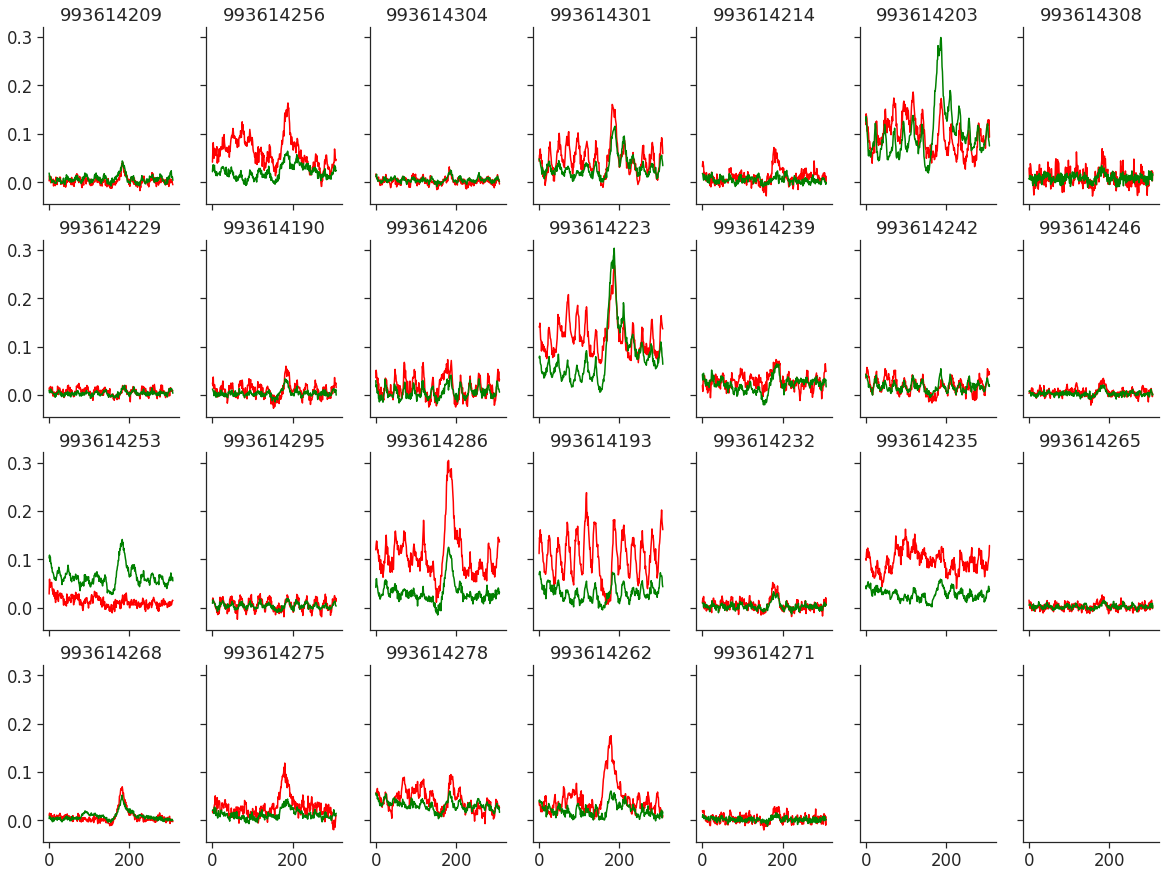

In [34]:
fig,ax = plt.subplots(4,7,figsize=(20,15),sharex=True,sharey=True)
for ii,cell_id in enumerate(odfm['cell_specimen_id'].unique()):
    ax.flatten()[ii].plot(
        odfm.query('cell_specimen_id == @cell_id and flash_metrics_labels == "low-lick,low-reward"').trace.mean(),
        color='red'
    )
    ax.flatten()[ii].plot(
        odfm.query('cell_specimen_id == @cell_id and flash_metrics_labels != "low-lick,low-reward"').trace.mean(),
        color='green'
    )
    ax.flatten()[ii].set_title(cell_id)

In [42]:
_dict = {}
_dict['time'] = odfm.iloc[0]['trace_timestamps']
cell_id = 993614193
for idx,row in odfm.iterrows():
    _dict[idx] = row['trace']
df = pd.DataFrame(_dict)
df

,time,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,...,4248,4249,4250,4251,4252,4253,4254,4255,4256,4257,4258,4259,4260,4261,4262,4263,4264,4265,4266,4267,4268,4269,4270,4271,4272,4273,4274,4275,4276,4277,4278,4279,4280,4281,4282,4283,4284,4285,4286,4287,4288,4289,4290,4291,4292,4293,4294,4295,4296,4297,4298,4299,4300,4301,4302,4303,4304,4305,4306,4307,4308,4309,4310,4311,4312,4313,4314,4315,4316,4317,4318,4319,4320,4321,4322,4323,4324,4325,4326,4327,4328,4329,4330,4331,4332,4333,4334,4335,4336,4337,4338,4339,4340,4341,4342,4343,4344,4345,4346,4347,4348,4349,4350,4351,4352,4353,4354,4355,4356,4357,4358,4359,4360,4361,4362,4363,4364,4365,4366,4367,4368,4369,4370,4371,4372,4373,4374,4375,4376,4377,4378,4379,4380,4381,4382,4383,4384,4385,4386,4387,4388,4389,4390,4391,4392,4393,4394,4395,4396,4397,4398,4399,4400,4401,4402,4403,4404,4405,4406,4407,4408,4409,4410,4411,4412,4413,4414,4415,4416,4417,4418,4419,4420,4421,4422,4423,4424,4425,4426,4427,4428,4429,4430,4431,4432,4433,4434,4435,4436,4437,4438,4439,4440,4441,4442,4443,4444,4445,4446,4447,4448,4449,4450,4451,4452,4453,4454,4455,4456,4457,4458,4459,4460,4461,4462,4463,4464,4465,4466,4467,4468,4469,4470,4471,4472,4473,4474,4475,4476,4477,4478,4479,4480,4481,4482,4483,4484,4485,4486,4487,4488,4489,4490,4491,4492,4493,4494,4495,4496,4497
0,-4.976557,0.001486,-0.024549,0.025393,-0.009182,0.046788,0.129077,0.042814,0.047429,0.098248,0.004014,0.014303,0.022924,0.018634,-0.044427,0.014846,-0.009256,0.031346,0.087026,-0.050871,-0.040666,0.029029,-0.000458,-0.036297,-0.034205,0.037982,0.016476,0.000012,0.042077,0.014508,0.012671,0.073856,0.233585,-0.088543,0.014823,0.049353,0.172070,0.222599,0.066796,0.009383,0.070169,0.162575,0.061487,0.035435,-0.030899,0.130612,-0.012934,0.004587,0.066515,0.005298,-0.020707,0.172300,-0.035238,0.062298,0.003554,0.078409,-0.022391,-0.067237,0.178701,-0.068820,0.002572,0.017026,-0.021787,-0.040906,-0.026044,0.025598,-0.010848,0.739350,0.007756,0.328505,0.011760,-0.034194,0.061750,0.059913,0.045874,0.022380,0.022630,0.153109,0.012291,-0.059717,-0.017001,0.139534,0.561719,-0.002885,0.482894,0.064576,0.010753,0.031727,0.208097,0.112779,0.052545,1.576381,0.062918,1.045393,0.043384,0.061317,0.225938,0.016258,0.049036,0.022688,0.066467,-0.060581,0.409398,0.128315,0.082259,0.022761,-0.021851,0.016369,0.053609,0.024545,0.156784,0.093197,-0.024832,0.024187,0.090400,-0.056612,0.004782,0.427964,0.034295,0.160789,-0.024928,-0.032695,0.072199,0.049049,-0.024418,0.086480,-0.022195,-0.001072,0.016137,0.005059,0.042920,-0.026656,0.008047,0.002110,0.034899,0.016855,-0.160434,0.013119,0.020136,0.002767,-0.031185,-0.003476,-0.062537,0.045398,-0.064987,-0.027268,-0.012066,-0.001833,-0.024659,-0.039210,-0.009450,0.036137,0.050712,0.063036,-0.053571,0.020210,-0.016093,-0.001701,0.005658,-0.020558,-0.022295,0.093846,0.023968,-0.032552,-0.021287,0.077660,0.055314,-0.027970,-0.068736,0.004359,-0.003467,-0.012565,-0.024782,0.086767,-0.012032,-0.044481,0.008220,-0.000695,0.026954,0.032322,-0.001766,-0.069284,-0.034928,-0.059144,-0.020908,0.015430,0.436260,0.046107,-0.070934,0.028551,-0.034164,-0.013883,0.025227,0.140490,-0.012706,-0.006119,0.036643,-0.0411

In [45]:
odfm.query('cell_specimen_id == @cell_id and flash_metrics_labels == "low-lick,low-reward"').index

Int64Index([3319, 3345, 3371, 3397, 3423, 3449, 3475, 3501, 3527, 3553, 3579,
            3605, 3631, 3657, 3683, 3709, 3735, 3761, 3787, 3813, 3839, 3865,
            3891, 3917, 3943, 3969, 3995, 4021, 4047, 4073, 4099, 4125, 4151,
            4177, 4203, 4229, 4255, 4281, 4307, 4333, 4359, 4385, 4411, 4437,
            4463, 4489],
           dtype='int64')

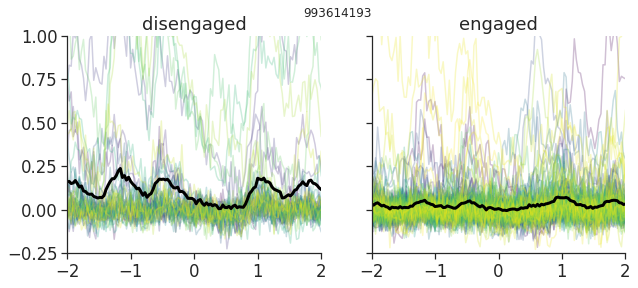

In [81]:
fig,ax=plt.subplots(1,2,figsize=(10,4),sharey=True,sharex=True)
plotting.event_triggered_response_plot(
    df,
    x_value='time',
    y_values=odfm.query('cell_specimen_id == @cell_id and flash_metrics_labels == "low-lick,low-reward"').index,
    fig=fig,
    ax_index=0
);
plotting.event_triggered_response_plot(
    df,
    x_value='time',
    y_values=odfm.query('cell_specimen_id == @cell_id and flash_metrics_labels != "low-lick,low-reward"').index,
    fig=fig,
    ax_index=1
);
ax[0].set_title('disengaged')
ax[1].set_title('engaged')
ax[1].set_xlim(-2,2)
ax[1].set_ylim(-0.25,1.0)
fig.suptitle(cell_id);

In [ ]:
def event_triggered_response_plot()

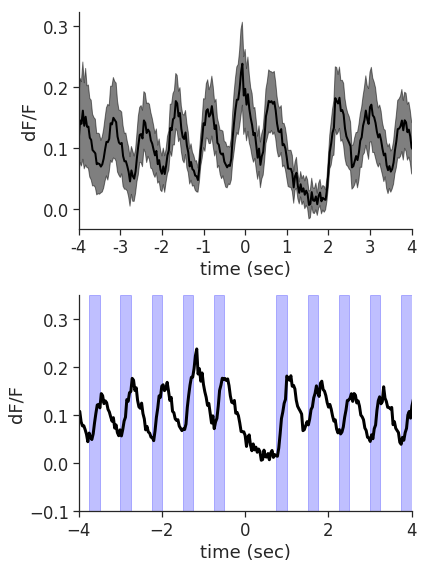

In [90]:
fig,ax=plt.subplots(2,1,figsize=(6,8))
sf.plot_mean_trace(
    traces = odfm.query('cell_specimen_id == @cell_id and flash_metrics_labels == "low-lick,low-reward"').trace.values,
    frame_rate=30,
    ax=ax[0]
)

# sf.plot_flashes_on_trace(ax[0], analysis)

ax[1].plot(
    odfm.iloc[0]['trace_timestamps'],
    odfm.query('cell_specimen_id == @cell_id and flash_metrics_labels == "low-lick,low-reward"').trace.values.mean(),
    color='black',
    linewidth=3,
)

plotting.designate_flashes(
    ax[1],
    omit=0,
)

ax[1].set_xlim(-4,4)
ax[1].set_ylim(-0.1,0.35)
ax[1].set_ylabel('dF/F')
ax[1].set_xlabel('time (sec)')
fig.tight_layout()

In [95]:
odfm.head()

,stimulus_presentations_id,cell_specimen_id,trace,trace_timestamps,mean_response,baseline_response,p_value_omission,p_value_stimulus,duration,end_frame,image_index_x,image_name_x,image_set,index,omitted_x,orientation,start_frame_x,start_time_x,stop_time_x,_id,flash_index,image_index_y,image_name_y,omitted_y,change,licked,lick_rate,rewarded,reward_rate,running_rate,bout_rate,hit_bout,hit_fraction,hit_rate,miss_rate,false_alarm_rate,correct_reject_rate,d_prime,criterion,high_lick,high_reward,flash_metrics_epochs,flash_metrics_labels,in_bout,bias,omissions1,task0,timing1D,start_time_y,start_frame_y,stop_time_y,epoch,behavior_session_id,criterion_negative,motivation_state,session_cluster_id,session_cluster_name
0,134,993614209,"[0.0014862406837258361, 0.06804372920248122, 0...","[-4.976556784712757, -4.944241480915921, -4.91...",-0.001657,0.031369,0.5663,0.6395,NaN,NaN,8,omitted,omitted,0,True,NaN,24016,408.81156,NaN,5e9525060c44554c287f5144,134,8,omitted,1,0,1,0.567426,0,0.07733,2.532308,0.18802,1.0,0.411284,1.0,0.0,0.088129,0.911871,3.678714,0.486991,1,1,1,"high-lick,high-reward",1,-1.421219,1.709756,3.084595,1.913926,400.597072,24016,NaN,0.0,993691759,0.281865,motivated,1,Quick Decay
1,134,993614256,"[-0.02454942788063707, -0.02667139097379241, -...","[-4.976556784712757, -4.944241480915921, -4.91...",-0.011205,0.001219,0.7361,0.7987,NaN,NaN,8,omitted,omitted,0,True,NaN,24016,408.81156,NaN,5e9525060c44554c287f5144,134,8,omitted,1,0,1,0.567426,0,0.07733,2.532308,0.18802,1.0,0.411284,1.0,0.0,0.088129,0.911871,3.678714,0.486991,1,1,1,"high-lick,high-reward",1,-1.421219,1.709756,3.084595,1.913926,400.597072,24016,NaN,0.0,993691759,0.281865,motivated,1,Quick Decay
2,134,993614304,"[0.02539331646397354, -0.00677127254102974, -0...","[-4.976556784712757, -4.944241480915921, -4.91...",0.010441,0.007335,0.1559,0.1417,NaN,NaN,8,omitted,omitted,0,True,NaN,24016,408.81156,NaN,5e9525060c44554c287f5144,134,8,omitted,1,0,1,0.567426,0,0.07733,2.532308,0.18802,1.0,0.411284,1.0,0.0,0.088129,0.911871,3.678714,0.486991,1,1,1,"high-lick,high-reward",1,-1.421219,1.709756,3.084595,1.913926,400.597072,24016,NaN,0.0,993691759,0.281865,motivated,1,Quick Decay
3,134,993614301,"[-0.009181683161341297, -0.024621025627364755,...","[-4.976556784712757, -4.944241480915921, -4.91...",-0.005430,0.000977,0.4613,0.7273,NaN,NaN,8,omitted,omitted,0,True,NaN,24016,408.81156,NaN,5e9525060c44554c287f5144,134,8,omitted,1,0,1,0.567426,0,0.07733,2.532308,0.18802,1.0,0.411284,1.0,0.0,0.088129,0.911871,3.678714,0.486991,1,1,1,"high-lick,high-reward",1,-1.421219,1.709756,3.084595,1.913926,400.597072,24016,NaN,0.0,993691759,0.281865,motivated,1,Quick Decay
4,134,993614214,"[0.04678764815236634, -0.008927105316680908, 0...","[-4.976556784712757, -4.944241480915921, -4.91...",-0.043694,0.000666,0.9825,0.9936,NaN,NaN,8,omitted,omitted,0,True,NaN,24016,408.81156,NaN,5e9525060c44554c287f5144,134,8,omitted,1,0,1,0.567426,0,0.07733,2.532308,0.18802,1.0,0.411284,1.0,0.0,0.088129,0.911871,3.678714,0.486991,1,1,1,"high-lick,high-reward",1,-1.421219,1.709756,3.084595,1.913926,400.597072,24016,NaN,0.0,993691759,0.281865,motivated,1,Quick Decay


In [117]:
def melt_response_df(df_in):
    time = df_in.iloc[0]['trace_timestamps']
    params_to_include = ['flash_metrics_labels']
    df_list = []
    for cell_specimen_id in df_in.cell_specimen_id.unique():
        for stimulus_presentations_id in df_in.stimulus_presentations_id.unique():
            _dict = {
                    'time':time,
                    'cell_specimen_id':[cell_specimen_id]*len(time),
                    'dff':df_in.query('stimulus_presentations_id == @stimulus_presentations_id and cell_specimen_id == @cell_specimen_id')['trace'].iloc[0],
                }
            for param in params_to_include:
                _dict.update({param:df_in.query('stimulus_presentations_id == @stimulus_presentations_id and cell_specimen_id == @cell_specimen_id')[param].iloc[0]})
            df_list.append(pd.DataFrame(_dict))
    return pd.concat(df_list)

In [174]:
df_in = odfm
time = df_in.iloc[0]['trace_timestamps']
time_df = pd.DataFrame(
    {
        'ts_index':np.arange(len(time)),
        'time':time
    }
)
cell_specimen_id = df_in.cell_specimen_id.unique()[0]
v = df_in.query('cell_specimen_id == @cell_specimen_id')['trace'].tolist()
v

[array([ 1.48624068e-03,  6.80437292e-02,  1.83666624e-02,  1.48924044e-02,
        -1.66895284e-03, -7.66572947e-03, -2.72895606e-02,  3.49334737e-03,
         0.00000000e+00, -1.17153945e-02,  8.46202723e-03,  2.85359598e-02,
        -5.55802473e-02, -4.47701735e-02,  8.09981553e-03,  6.73319012e-02,
        -5.39137574e-03, -3.10011363e-02, -6.81161562e-02,  8.35942922e-04,
        -4.08358630e-02,  2.25612905e-03, -6.12843680e-02, -4.88202678e-03,
        -1.94978825e-02, -8.28226036e-02, -2.89911336e-02,  3.33725570e-02,
        -4.58930658e-02, -4.86839799e-02,  5.52026961e-02, -3.06033043e-02,
        -6.85185228e-02, -1.42269761e-03,  3.20368879e-03,  1.39149714e-03,
         2.31571326e-02,  1.80619013e-02,  5.41815012e-02,  3.11648400e-02,
         1.46759834e-01,  1.52471726e-01,  3.50521386e-03,  1.27601606e-01,
         5.23718139e-02,  2.60310224e-02, -3.19679414e-02, -6.21302966e-02,
        -8.75498786e-02, -1.08151048e-02, -3.86534631e-02, -1.82808194e-02,
        -3.3

In [171]:
a = np.array([[1, 2, 3], [2, 4, 5], [1, 2, 3]]) 
a

array([[1, 2, 3],
       [2, 4, 5],
       [1, 2, 3]])

In [175]:
dataset.

In [118]:
%%time
odfm_melted = melt_response_df(odfm)

CPU times: user 41 s, sys: 24.7 s, total: 1min 5s
Wall time: 31.6 s


In [133]:
def assign_engagement_label(input_label):
    if 'high-lick' in input_label:
        return 'engaged'
    elif 'low-lick' in input_label:
        return 'disengaged'
odfm_melted['engagement_state'] = odfm_melted['flash_metrics_labels'].map(lambda x: assign_engagement_label(x))

In [134]:
odfm_melted.sample(4)

,time,cell_specimen_id,dff,flash_metrics_labels,engagement_state
118,-1.163351,993614253,-0.080441,"high-lick,low-reward",engaged
81,-2.359017,993614304,0.046862,"high-lick,high-reward",engaged
152,-0.064631,993614268,-0.023870,"high-lick,high-reward",engaged
56,-3.166900,993614301,0.045601,"high-lick,low-reward",engaged


(-4, 4)

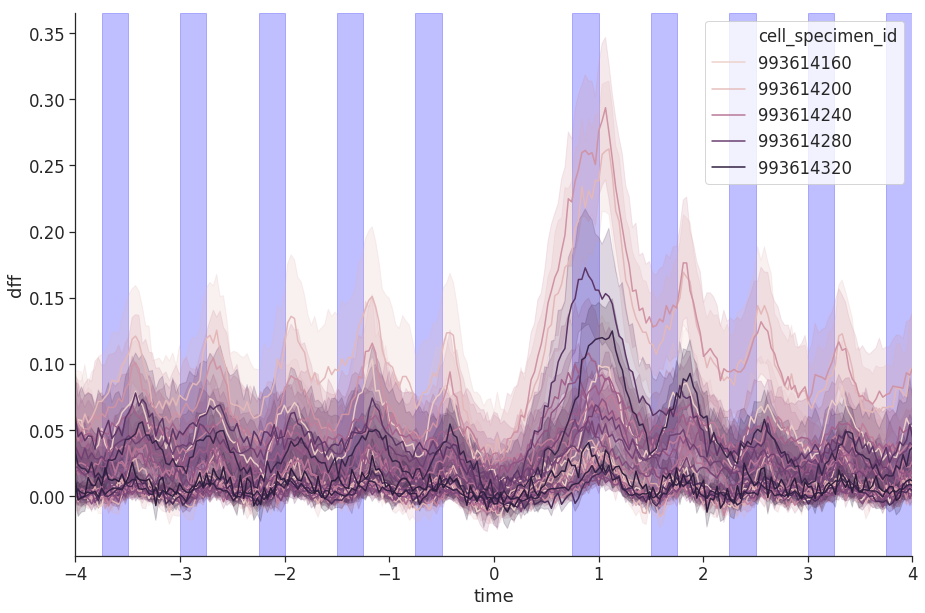

In [142]:
fig,ax=plt.subplots(figsize=(15,10))

sns.lineplot(
    x = 'time',
    y = 'dff',
    data = odfm_melted,
    hue='cell_specimen_id',
)

plotting.designate_flashes(
    ax,
    omit=0,
)

ax.set_xlim(-4,4)

In [141]:
dataset